In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import numpy as np

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import logistic
import numpy as np

# 데이터 로드 (CSV 파일로 저장되어 있다고 가정)
df  = pd.read_csv('../응답_데이터.csv')

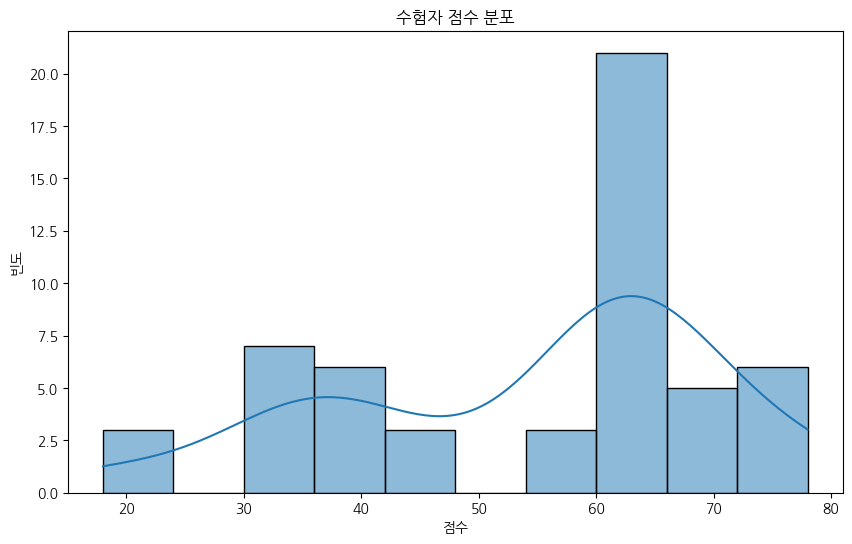

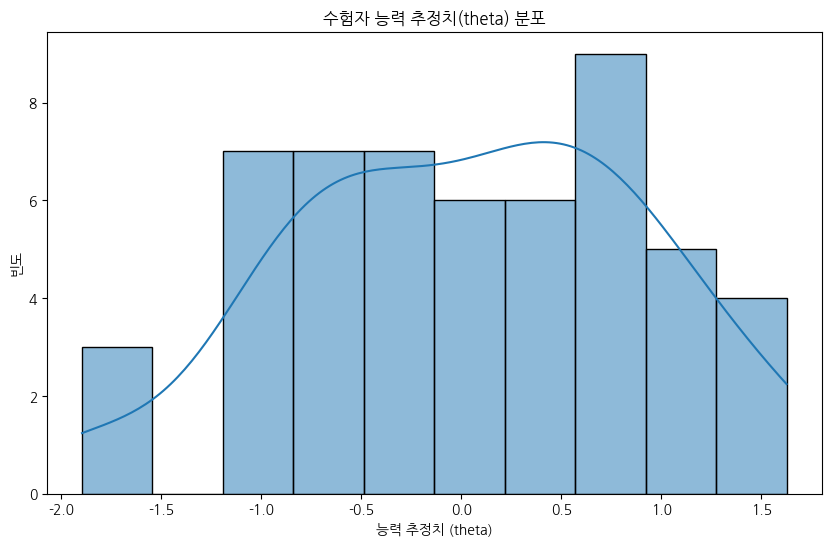

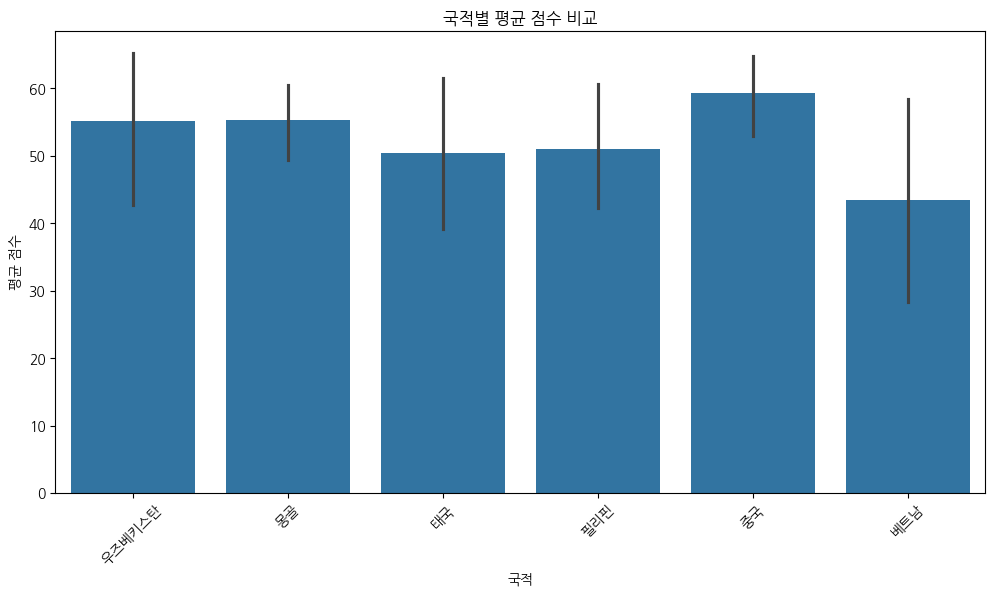

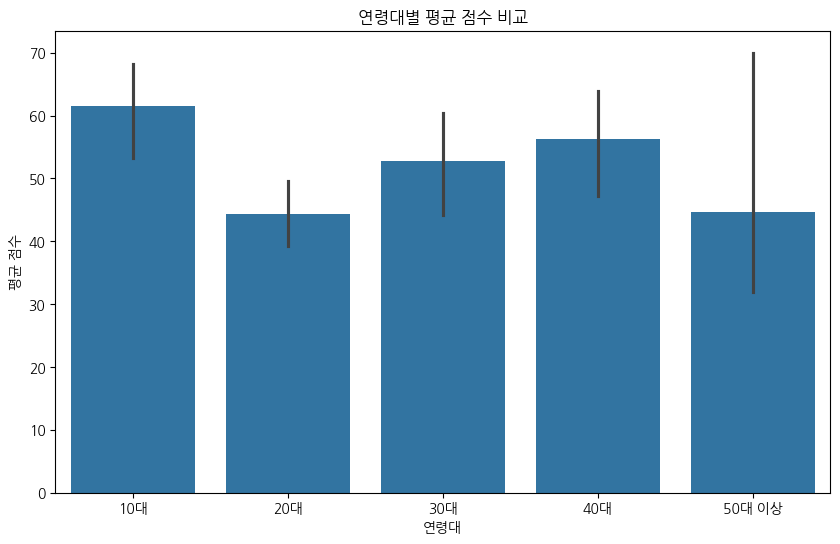

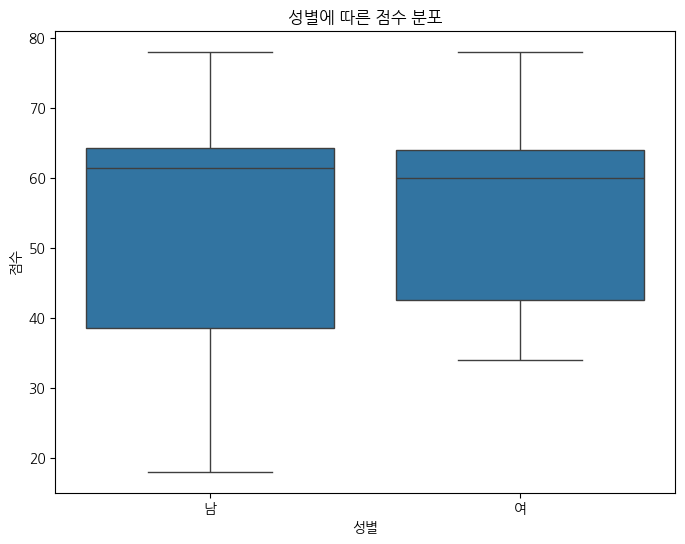

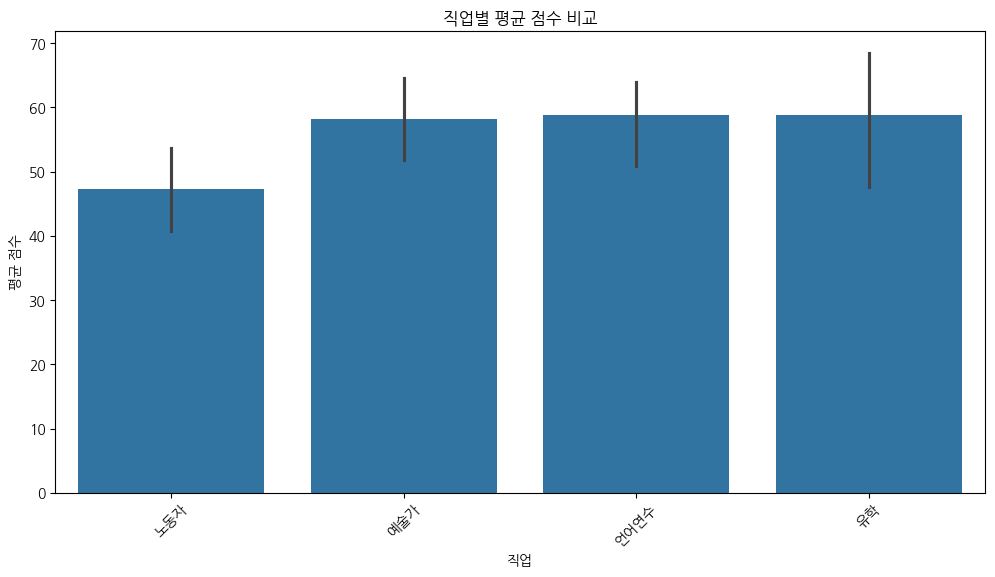

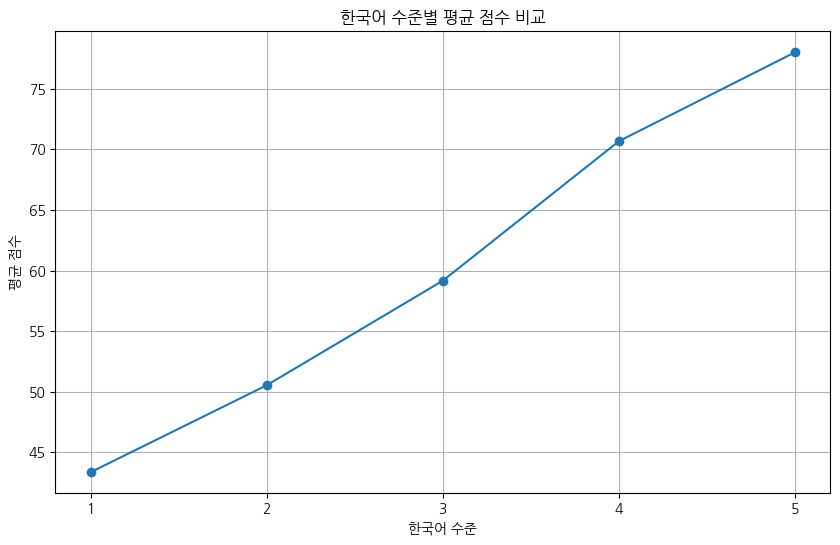

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 전처리
# 시험지 문항구성 정보
df_questions = pd.read_csv('../exam1.csv')

# 수험자응답정보
df_responses = pd.read_csv('../응답_데이터.csv')

# 문항IRT 분석정보
df_irt = pd.read_csv('../문항_매개변수.csv')

# 수험자 능력정보
df_ability = pd.read_csv('../수험생_능력_추정치.csv')

# 수험자응답정보와 수험자 능력정보를 병합
df = pd.merge(df_responses, df_ability, on='이름')

# 1. 수험자 점수 분포 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df['점수'], bins=10, kde=True)
plt.title('수험자 점수 분포')
plt.xlabel('점수')
plt.ylabel('빈도')
plt.show()

# 2. 수험자 능력 추정치(theta) 분포 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df['능력 추정치 (theta)'], bins=10, kde=True)
plt.title('수험자 능력 추정치(theta) 분포')
plt.xlabel('능력 추정치 (theta)')
plt.ylabel('빈도')
plt.show()

# 3. 국적별 평균 점수 비교 막대 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='국적', y='점수', data=df, estimator=np.mean)
plt.title('국적별 평균 점수 비교')
plt.xlabel('국적')
plt.ylabel('평균 점수')
plt.xticks(rotation=45)
plt.show()

# 4. 연령대별 평균 점수 비교 막대 그래프
df['연령대'] = pd.cut(df['나이'], bins=[0, 20, 30, 40, 50, 100], labels=['10대', '20대', '30대', '40대', '50대 이상'])
plt.figure(figsize=(10, 6))
sns.barplot(x='연령대', y='점수', data=df, estimator=np.mean)
plt.title('연령대별 평균 점수 비교')
plt.xlabel('연령대')
plt.ylabel('평균 점수')
plt.show()

# 5. 성별에 따른 점수 분포 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x='성별', y='점수', data=df)
plt.title('성별에 따른 점수 분포')
plt.xlabel('성별')
plt.ylabel('점수')
plt.show()

# 6. 직업별 평균 점수 비교 막대 그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='직업', y='점수', data=df, estimator=np.mean)
plt.title('직업별 평균 점수 비교')
plt.xlabel('직업')
plt.ylabel('평균 점수')
plt.xticks(rotation=45)
plt.show()

# 7. 한국어 수준별 평균 점수 비교 선 그래프
level_order = sorted(df['한국어 수준'].unique())
mean_scores = df.groupby('한국어 수준')['점수'].mean().reindex(level_order)

plt.figure(figsize=(10, 6))
plt.plot(level_order, mean_scores, marker='o')
plt.title('한국어 수준별 평균 점수 비교')
plt.xlabel('한국어 수준')
plt.ylabel('평균 점수')
plt.xticks(level_order)
plt.grid(True)
plt.show()